<a href="https://colab.research.google.com/github/Ignas12345/Project_in_computational_biology_take_2/blob/main/Comparison_with_ground_truth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Ignas12345/Project_in_Computational_Biology_take_2.git

Cloning into 'Project_in_Computational_Biology_take_2'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 176 (delta 51), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (176/176), 19.54 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
from Project_in_Computational_Biology_take_2.code.helpers import *
from Project_in_Computational_Biology_take_2.code.CV_methods import *
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [ ]:
import os
os.makedirs('CV_images')

Here we can run Comparisons with the ground Truth Image

In [ ]:
dip_image_tensor = image_to_tensor(Image.open('/content/High_resolution_iteration_4000.jpg'))
dip_image_with_edges_tensor = image_to_tensor(Image.open('/content/High_resolution_with_edges_iteration_4000.jpg'))
#image_for_edge_map_tensor = image_to_tensor(Image.open('/content/Image_used_for_edge_map.jpg'))
corrupted_image_tensor = image_to_tensor(turn_to_grayscale((Image.open('/content/corrupted_img.jpg'))))

dip_image_array = dip_image_tensor.numpy()
dip_image_with_edges_array = dip_image_with_edges_tensor.numpy()
#image_for_edge_map_array = image_for_edge_map_tensor.numpy()
corrupted_image_array = corrupted_image_tensor.numpy()

dip_image = tensor_to_image(dip_image_tensor)
dip_image_with_edges = tensor_to_image(dip_image_with_edges_tensor)
#image_for_edge_map = tensor_to_image(image_for_edge_map_tensor)
corrupted_image = tensor_to_image(corrupted_image_tensor)

ground_truth_image_tensor = image_to_tensor(crop(turn_to_grayscale(Image.open('/content/ground_truth – kopija.jpg')), dip_image.size))
ground_truth_image_array = ground_truth_image_tensor.numpy()
ground_truth_image = tensor_to_image(ground_truth_image_tensor)
ground_truth_image.save('ground_truth.jpg')

In [ ]:
CV_image_nearest = turn_to_grayscale(upsample_nearest_neighbours(corrupted_image, upscaling_factor = 4))
CV_image_nearest.save('nearest_neighs_upscaling.jpg')
CV_image_nearest_tensor = image_to_tensor(CV_image_nearest)
CV_image_nearest_array = CV_image_nearest_tensor.numpy()

In [ ]:
CV_image_bicubic = turn_to_grayscale(upsample_bicubic(corrupted_image, upscaling_factor = 4))
CV_image_bicubic.save('bicubic_upscaling.jpg')
CV_image_bicubic_tensor = image_to_tensor(CV_image_bicubic)
CV_image_bicubic_array = CV_image_bicubic_tensor.numpy()

In [ ]:
print(ground_truth_image_array.shape)
print(CV_image_nearest_array.shape)
print(CV_image_bicubic_array.shape)

(1, 1, 1200, 1600)
(1, 1, 1200, 1600)
(1, 1, 1200, 1600)


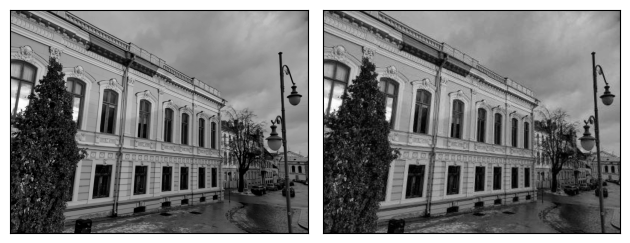

Nearest Neighbours upscaling

MSE: 0.00778; PSNR: 21.1


In [ ]:
plot([ground_truth_image, CV_image_nearest], cmap = 'gray')
print('Nearest Neighbours upscaling')
print('')
print('MSE: ' + str(float('%.3g' % compare_images_mse(ground_truth_image_array, CV_image_nearest_array)))  +'; PSNR: ' + str(float('%.3g' % compare_psnr(ground_truth_image_array, CV_image_nearest_array))))

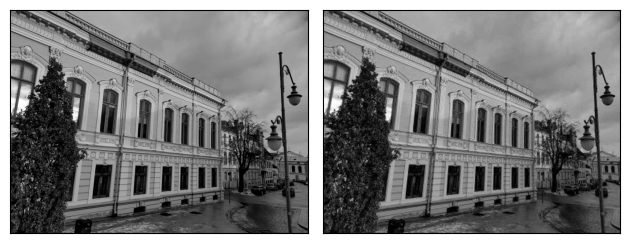

Bicubic upscaling

MSE: 0.00665; PSNR: 21.8


In [ ]:
plot([ground_truth_image, CV_image_bicubic], cmap = 'gray')
print('Bicubic upscaling')
print('')
print('MSE: ' + str(float('%.3g' % compare_images_mse(ground_truth_image_array, CV_image_bicubic_array)))  +'; PSNR: ' + str(float('%.3g' % compare_psnr(ground_truth_image_array, CV_image_bicubic_array))))

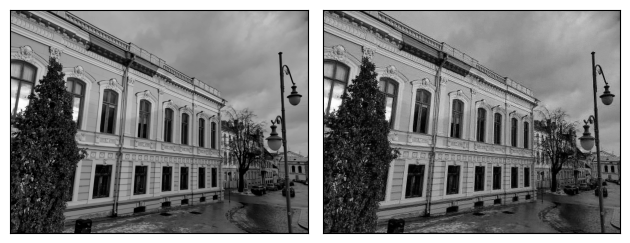

DIP upscaling

MSE: 0.0109; PSNR: 19.6


In [ ]:
plot([ground_truth_image, dip_image] , cmap = 'gray')
print('DIP upscaling')
print('')
print('MSE: ' + str(float('%.3g' % compare_images_mse(ground_truth_image, dip_image)))  +'; PSNR: ' + str(float('%.3g' % compare_psnr(ground_truth_image_array, dip_image_array))))

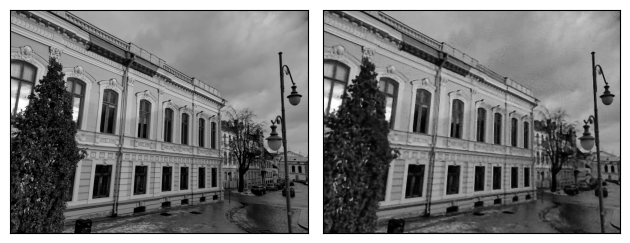

DIP with edges

MSE: 0.00927; PSNR: 20.3


In [ ]:
plot([ground_truth_image, dip_image_with_edges], cmap = 'gray')
print('DIP with edges')
print('')
print('MSE: ' + str(float('%.3g' % compare_images_mse(ground_truth_image, dip_image_with_edges)))  +'; PSNR: ' + str(float('%.3g' % compare_psnr(ground_truth_image_array, dip_image_with_edges_array))))

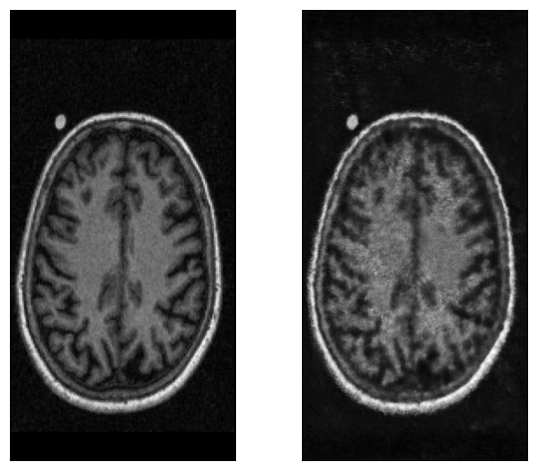

Image used for Edge Map

MSE: 0.00321; PSNR: 24.8


In [ ]:
plot([ground_truth_image, image_for_edge_map], cmap = 'gray')
print('Image used for Edge Map')
print('')
print('MSE: ' + str(float('%.3g' % compare_images_mse(ground_truth_image, image_for_edge_map)))  +'; PSNR: ' + str(float('%.3g' % compare_psnr(ground_truth_image_array, image_for_edge_map_array))))